<a href="https://colab.research.google.com/github/marcelounb/ML-Mastery-with-Python-Course/blob/master/chap20_CNN_Testing_by_Marcelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


'2.2.0-rc3'

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from math import sqrt

In [0]:
#Loading data - First of all:: know your data
filename = '/content/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

dataset = pd.read_csv(filename, delim_whitespace=True, names=names)

In [4]:
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [0]:
array = dataset.values
X = array[:, 0:13]
y = array[:,13]

In [6]:
X[0]  # Unchanged data

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [0]:
# Scaling before training the model
sc = StandardScaler()
X = sc.fit_transform(X)

In [8]:
X[0]  # Scaled data

array([-0.41978194,  0.28482986, -1.2879095 , -0.27259857, -0.14421743,
        0.41367189, -0.12001342,  0.1402136 , -0.98284286, -0.66660821,
       -1.45900038,  0.44105193, -1.0755623 ])

In [0]:
# Defining the Training, Validation and Test sets
validation_size = 0.20 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size)

In [10]:
X_train.shape

(404, 13)

In [11]:
X_test.shape

(102, 13)

# Construção e treinamento do modelo de rede neural

In [12]:
# 13 -> 260 -> 260 -> 260 -> 1 :: Input shape
classifier = tf.keras.models.Sequential()
classifier.add(tf.keras.layers.Dense(units=260, activation='relu', input_shape=(13, )))
classifier.add(tf.keras.layers.Dropout(0.3))  # Vai zerar 30% dos neuronios de cima
classifier.add(tf.keras.layers.Dense(units=260, activation='relu'))
classifier.add(tf.keras.layers.Dropout(0.3))  # Vai zerar 30% dos neuronios de cima
classifier.add(tf.keras.layers.Dense(units=260, activation='relu'))
classifier.add(tf.keras.layers.Dropout(0.3))  # Vai zerar 30% dos neuronios de cima
classifier.add(tf.keras.layers.Dense(units=1))
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 260)               3640      
_________________________________________________________________
dropout (Dropout)            (None, 260)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 260)               67860     
_________________________________________________________________
dropout_1 (Dropout)          (None, 260)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 260)               67860     
_________________________________________________________________
dropout_2 (Dropout)          (None, 260)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2

In [0]:
classifier.compile(optimizer='Adam', loss='mean_squared_error', metrics = ['mean_squared_error'])

In [14]:
epochs_hist = classifier.fit(X_train, y_train, epochs = 200)

Epoch 1/200
13/13 [==============================] - 0s 3ms/step - loss: 431.2878 - mean_squared_error: 440.6047
Epoch 2/200
13/13 [==============================] - 0s 3ms/step - loss: 116.5957 - mean_squared_error: 118.0998
Epoch 3/200
13/13 [==============================] - 0s 3ms/step - loss: 49.1334 - mean_squared_error: 48.5642
Epoch 4/200
13/13 [==============================] - 0s 3ms/step - loss: 38.9228 - mean_squared_error: 37.9160
Epoch 5/200
13/13 [==============================] - 0s 3ms/step - loss: 30.3012 - mean_squared_error: 29.8786
Epoch 6/200
13/13 [==============================] - 0s 3ms/step - loss: 25.2452 - mean_squared_error: 25.6939
Epoch 7/200
13/13 [==============================] - 0s 3ms/step - loss: 26.2953 - mean_squared_error: 26.4727
Epoch 8/200
13/13 [==============================] - 0s 3ms/step - loss: 21.8169 - mean_squared_error: 22.1157
Epoch 9/200
13/13 [==============================] - 0s 4ms/step - loss: 21.8634 - mean_squared_error: 21.71

In [0]:
y_pred = classifier.predict(X_test)

In [16]:
epochs_hist.history.keys()

dict_keys(['loss', 'mean_squared_error'])

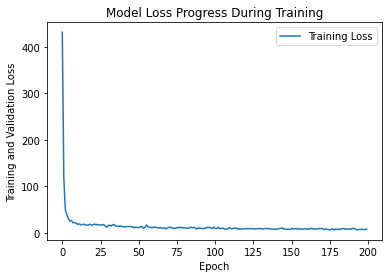

In [21]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss']);

In [18]:
epochs_hist.history['mean_squared_error']

[440.6047058105469,
 118.09981536865234,
 48.56416320800781,
 37.915992736816406,
 29.87856101989746,
 25.693944931030273,
 26.472667694091797,
 22.115680694580078,
 21.711467742919922,
 21.06960105895996,
 18.193025588989258,
 19.41471290588379,
 17.812408447265625,
 17.769817352294922,
 19.197641372680664,
 16.827014923095703,
 16.720361709594727,
 16.455928802490234,
 18.549386978149414,
 16.912494659423828,
 17.15613555908203,
 18.41263771057129,
 17.783584594726562,
 18.082611083984375,
 16.87335205078125,
 17.24408531188965,
 17.051063537597656,
 17.952892303466797,
 14.937789916992188,
 12.167091369628906,
 15.513134002685547,
 16.633487701416016,
 15.113903999328613,
 17.761865615844727,
 18.1214599609375,
 14.305313110351562,
 14.054983139038086,
 14.247288703918457,
 15.35067081451416,
 13.080899238586426,
 13.602718353271484,
 12.364516258239746,
 14.021760940551758,
 13.374616622924805,
 14.14791202545166,
 12.758849143981934,
 13.435980796813965,
 10.73229694366455,
 12.41